In [1]:
from Transformacion import transformacion_escalas, calado_eslora_100m, tiempo_eslora_100m, filtro_terminales, transformacion_tiempos_camion
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp

1. CREACIÓN DEL DATAFRAME DE ESCALAS DE TODOS LOS AÑOS Y DEL DATAFRAME CON SÓLO LAS TERMINALES A ANALIZAR

In [2]:
# Vamos a crear un dataframe igual para cada año, y los vamos a concatenar:
df_escalas_totales = pd.DataFrame()
for i in range(2020, 2024):
    df_escalas_totales = pd.concat([df_escalas_totales, transformacion_escalas(i)])

df_escalas_totales.sort_values(by="ETAUTC", ascending=True)

,ESCALANUM,ANYESCALA,NUM_MES,MESESCALA,VAIXELLNOM,VAIXELLBANDERACODI,VAIXELLBANDERANOM,MMSI,IMO,CALLSIGN,...,MANEGA_METRES,VAIXELLTIPUS,TERMINALNOM,ETAUTC,ETDUTC,HORASOPERACIONES,PORTORIGENCODI,PORTORIGENNOM,PORTDESTICODI,PORTDESTINOM
282,13779,2019,1,Enero,ANGELA,GI,Gibraltar,236466000,9326976,ZDIN3,...,22.5,Portacontenidors,NaN,2020-01-01 01:12:00,2020-01-01 23:04:00,21.866667,FRMRS,Marseille,MACAS,Casablanca
42,13926,2019,1,Enero,FLENSBURG,CY,Xipre,209762000,9252773,5BSX3,...,22.5,Portacontenidors,BEST,2020-01-01 01:41:00,2020-01-02 17:27:00,39.766667,FRFOS,Fos-sur-Mer,DZALG,Alger (Algiers)
307,14266,2019,1,Enero,K-RIVER,PT,Portugal,255805995,9138355,CQIL7,...,NaN,Portacontenidors,NaN,2020-01-01 01:59:00,2020-01-06 09:44:00,127.750000,FRFOS,Fos-sur-Mer,DZALG,Alger (Algiers)
165,14501,2019,1,Enero,MED EMRE,MT,Malta,215402000,9461910,9HA5093,...,17.2,Tancs,TERMINALES PORTUARIAS SL,2020-01-01 02:40:00,2020-01-02 06:05:00,27.416667,ESCAS,Castellon de la Plana,FRLAV,Lavera
295,14541,2019,1,Enero,MED ANTARCTIC,MT,Malta,248315000,9462316,9HA4607,...,NaN,Tancs,NaN,2020-01-01 02:42:00,2020-01-02 01:26:00,22.733333,ESCAS,Castellon de la Plana,FRSET,Sete
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2432,44485,2023,4,Abril,GNV BRIDGE,IT,Itàlia,247435900,9893369,ICGZ,...,NaN,Transbordadors,TERMINAL FERRY DE BARCELONA SRLU,2023-04-30 15:52:00,2023-04-30 20:30:00,4.633333,ESPMI,Palma de Mallorca,ESPMI,Palma de Mallorca
1586,43538,2023,4,Abril,ODYSSEUS,LR,Libèria,636016770,9315824,A8KC9,...,NaN,Portacontenidors,APMT BARCELONA,2023-04-30 16:00:00,2023-05-01 00:00:00,8.000000,MACAS,Casablanca,GRPIR,Piraeus
1688,44569,2023,4,Abril,PERSEUS,PT,Portugal,255806363,9371414,CQEE8,...,NaN,Portacontenidors,APMT BARCELONA,2023-04-30 17:00:00,2023-05-01 10:00:00,17.000000,ESALC,Alicante,ESVLC,Valencia
717,44614,2023,4,Abril,HYPATIA DE ALEJANDRIA,CY,Xipre,209462000,9498755,5BDE5,...,25.6,Transbordadors,TERMINAL PORT NOU SA,2023-04-30 17:00:00,2023-04-30 19:45:00,2.750000,ESALD,Alcudia,ESALD,Alcudia


In [3]:
df_escalas_totales.shape

(31849, 22)

In [4]:
# Creamos una columna con la relación calado/eslora (la calculamos para un buque medio de 100m) para tener una aproximación de si los buques iban muy cargados:
calado_eslora_100m(df_escalas_totales,"CALAT_METRES", "ESLORA_METRES","CALAT/ESLORA_100m")


,ESCALANUM,ANYESCALA,NUM_MES,MESESCALA,VAIXELLNOM,VAIXELLBANDERACODI,VAIXELLBANDERANOM,MMSI,IMO,CALLSIGN,...,VAIXELLTIPUS,TERMINALNOM,ETAUTC,ETDUTC,HORASOPERACIONES,PORTORIGENCODI,PORTORIGENNOM,PORTDESTICODI,PORTDESTINOM,CALAT/ESLORA_100m
0,14343,2019,1,Enero,OCEAN PRINCESS I,MH,Illes Marshall,538003578,9391517,V7RT9,...,Tancs,RECEPTORA DE LIQUIDOS SA,2020-01-01 21:22:00,2020-01-04 06:57:00,57.583333,ESHUV,Huelva,ESBIO,Bilbao,7.114754
1,14442,2019,1,Enero,MAERSK BERING,SG,Singapur,563654000,9299422,9VJK2,...,Tancs,RECEPTORA DE LIQUIDOS SA,2020-01-02 09:06:00,2020-01-03 09:36:00,24.500000,MTMLA,Malta (Valetta),ESCAR,Cartagena,5.424501
2,14425,2019,1,Enero,ARIETTA A,LR,Libèria,0,9554664,3FDT6,...,Granelers,PORTCEMEN SA,2020-01-01 18:33:00,2020-01-04 11:26:00,64.883333,ESSAG,Sagunto,SLFNA,Freetown,6.737551
3,14450,2019,1,Enero,DALYA H,AG,Antigua i Barbuda,305832000,9139127,V2FX4,...,Càrrega (Lo-Lo),TERMINAL PORT NOU SA,2020-01-02 09:44:00,2020-01-02 15:30:00,5.766667,DZORN,Oran,ESVLC,Valencia,5.870063
4,13519,2019,1,Enero,ATLANTIS,AG,Antigua i Barbuda,304535000,9264740,V2BF5,...,Portacontenidors,TERMINAL PORT NOU SA,2020-01-10 08:16:00,2020-01-10 15:06:00,6.833333,ESCAS,Castellon de la Plana,LYMRA,Misurata,5.444947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3241,44420,2023,4,Abril,MAERSK MARU,SG,Singapur,563087300,9581447,9V6431,...,Tancs,NaN,2023-04-22 07:05:00,2023-04-28 18:42:00,155.616667,FRSET,Sete,FRNOU,Port-la-Nouvelle,7.011501
3242,44681,2023,4,Abril,JS LEKVAR,SG,Singapur,566725000,9578036,9V9997,...,Petroliers,NaN,2023-04-30 11:33:00,2023-04-30 18:59:00,7.433333,FRLAV,Lavera,FRLAV,Lavera,7.060000
3243,41790,2023,1,Enero,GLOBAL LAKE,TR,Turquia,271049800,9427469,TCA6824,...,Tancs,NaN,2023-01-27 12:41:00,2023-01-28 14:14:00,25.550000,BGBAL,Balchik,DZAZW,Arzew,6.388642
3244,41790,2023,1,Enero,GLOBAL LAKE,TR,Turquia,271049800,9427469,TCA6824,...,Tancs,NaN,2023-01-30 01:50:00,2023-02-01 15:50:00,62.000000,BGBAL,Balchik,DZAZW,Arzew,6.388642


In [5]:
# Creamos una columna con la relación horas operando un buque / eslora (la calculamos para un buque medio de 100m) para ver las diferencias de tiempos de carga/descarga entre terminales:
tiempo_eslora_100m(df_escalas_totales, "ESLORA_METRES", "HORASOPERACIONES", "HORAS/ESLORA_100m")

,ESCALANUM,ANYESCALA,NUM_MES,MESESCALA,VAIXELLNOM,VAIXELLBANDERACODI,VAIXELLBANDERANOM,MMSI,IMO,CALLSIGN,...,TERMINALNOM,ETAUTC,ETDUTC,HORASOPERACIONES,PORTORIGENCODI,PORTORIGENNOM,PORTDESTICODI,PORTDESTINOM,CALAT/ESLORA_100m,HORAS/ESLORA_100m
0,14343,2019,1,Enero,OCEAN PRINCESS I,MH,Illes Marshall,538003578,9391517,V7RT9,...,RECEPTORA DE LIQUIDOS SA,2020-01-01 21:22:00,2020-01-04 06:57:00,57.583333,ESHUV,Huelva,ESBIO,Bilbao,7.114754,31.466302
1,14442,2019,1,Enero,MAERSK BERING,SG,Singapur,563654000,9299422,9VJK2,...,RECEPTORA DE LIQUIDOS SA,2020-01-02 09:06:00,2020-01-03 09:36:00,24.500000,MTMLA,Malta (Valetta),ESCAR,Cartagena,5.424501,13.960114
2,14425,2019,1,Enero,ARIETTA A,LR,Libèria,0,9554664,3FDT6,...,PORTCEMEN SA,2020-01-01 18:33:00,2020-01-04 11:26:00,64.883333,ESSAG,Sagunto,SLFNA,Freetown,6.737551,34.152718
3,14450,2019,1,Enero,DALYA H,AG,Antigua i Barbuda,305832000,9139127,V2FX4,...,TERMINAL PORT NOU SA,2020-01-02 09:44:00,2020-01-02 15:30:00,5.766667,DZORN,Oran,ESVLC,Valencia,5.870063,5.737406
4,13519,2019,1,Enero,ATLANTIS,AG,Antigua i Barbuda,304535000,9264740,V2BF5,...,TERMINAL PORT NOU SA,2020-01-10 08:16:00,2020-01-10 15:06:00,6.833333,ESCAS,Castellon de la Plana,LYMRA,Misurata,5.444947,5.153343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3241,44420,2023,4,Abril,MAERSK MARU,SG,Singapur,563087300,9581447,9V6431,...,NaN,2023-04-22 07:05:00,2023-04-28 18:42:00,155.616667,FRSET,Sete,FRNOU,Port-la-Nouvelle,7.011501,86.458507
3242,44681,2023,4,Abril,JS LEKVAR,SG,Singapur,566725000,9578036,9V9997,...,NaN,2023-04-30 11:33:00,2023-04-30 18:59:00,7.433333,FRLAV,Lavera,FRLAV,Lavera,7.060000,7.433333
3243,41790,2023,1,Enero,GLOBAL LAKE,TR,Turquia,271049800,9427469,TCA6824,...,NaN,2023-01-27 12:41:00,2023-01-28 14:14:00,25.550000,BGBAL,Balchik,DZAZW,Arzew,6.388642,22.670807
3244,41790,2023,1,Enero,GLOBAL LAKE,TR,Turquia,271049800,9427469,TCA6824,...,NaN,2023-01-30 01:50:00,2023-02-01 15:50:00,62.000000,BGBAL,Balchik,DZAZW,Arzew,6.388642,55.013310


In [6]:
df_escalas_totales.to_csv("/Users/xavi/Documents/Ironhack/Projects/BCN_terminals_project/CSV_finales/Escalas_totales.csv")

In [7]:
df_escalas_totales.TERMINALNOM.unique()
lista_terminales = ["APMT BARCELONA", "BEST"]

Obtención del dataframe con únicamente las terminales APM y BEST:

In [8]:
df_filtrado_terminales = filtro_terminales(lista_terminales, df_escalas_totales, "TERMINALNOM")

In [9]:
df_filtrado_terminales.to_csv("/Users/xavi/Documents/Ironhack/Projects/BCN_terminals_project/CSV_finales/df_APM_BEST.csv")

In [10]:
df_filtrado_terminales

,ESCALANUM,ANYESCALA,NUM_MES,MESESCALA,VAIXELLNOM,VAIXELLBANDERACODI,VAIXELLBANDERANOM,MMSI,IMO,CALLSIGN,...,TERMINALNOM,ETAUTC,ETDUTC,HORASOPERACIONES,PORTORIGENCODI,PORTORIGENNOM,PORTDESTICODI,PORTDESTINOM,CALAT/ESLORA_100m,HORAS/ESLORA_100m
39,13909,2019,1,Enero,NICOLA,AG,Antigua i Barbuda,304010851,9179567,V2BV2,...,BEST,2020-01-06 11:23:00,2020-01-06 20:14:00,8.850000,ESVLC,Valencia,FRMRS,Marseille,6.613394,6.735160
40,13845,2019,1,Enero,JSP BORA,AG,Antigua i Barbuda,305079000,9390472,V2CQ4,...,BEST,2020-01-28 01:25:00,2020-01-28 09:10:00,7.750000,ESVLC,Valencia,DZBJA,Bejaia (ex Bougie),5.756223,5.242154
41,13758,2019,3,Marzo,JULIUS-S,AG,Antigua i Barbuda,304010000,9294018,V2GN4,...,BEST,2020-03-01 21:39:00,2020-03-02 15:12:00,17.550000,ITGOA,Genoa,ESVLC,Valencia,5.496625,8.461909
42,13926,2019,1,Enero,FLENSBURG,CY,Xipre,209762000,9252773,5BSX3,...,BEST,2020-01-01 01:41:00,2020-01-02 17:27:00,39.766667,FRFOS,Fos-sur-Mer,DZALG,Alger (Algiers),6.478727,29.579490
43,14508,2019,1,Enero,FLENSBURG,CY,Xipre,209762000,9252773,5BSX3,...,BEST,2020-01-12 16:02:00,2020-01-13 04:44:00,12.700000,FRFOS,Fos-sur-Mer,DZALG,Alger (Algiers),6.478727,9.446593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,42334,2023,3,Marzo,SASKIA A,TR,Turquia,271044177,9315927,TCA3543,...,APMT BARCELONA,2023-03-11 17:06:00,2023-03-12 06:38:00,13.533333,MACAS,Casablanca,GRPIR,Piraeus,5.405405,6.096096
1697,43184,2023,3,Marzo,IZMIT EXPRESS,TR,Turquia,271044643,9740665,TCA4385,...,APMT BARCELONA,2023-03-15 23:33:00,2023-03-16 19:44:00,20.183333,ITGOA,Genoa,DOCAU,Caucedo,5.913978,10.851254
1698,43186,2023,3,Marzo,MERSIN EXPRESS,TR,Turquia,271044570,9740653,TCA4232,...,APMT BARCELONA,2023-03-23 03:11:00,2023-03-23 18:25:00,15.233333,ITGOA,Genoa,DOCAU,Caucedo,5.913978,8.189964
1699,43633,2023,4,Abril,SASKIA A,TR,Turquia,271044177,9315927,TCA3543,...,APMT BARCELONA,2023-04-15 10:37:00,2023-04-15 22:38:00,12.016667,MACAS,Casablanca,GRPIR,Piraeus,5.405405,5.412913


2. ANÁLISIS DE EFICIENCIA EN LA CARGA Y DESCARGA DE BUQUES POR CADA TERMINAL

In [11]:
# Estudiamos en qué meses llegan más buques. Para ello, vamos a agrupar el df por meses:

month_grouped = df_filtrado_terminales.groupby(["NUM_MES","MESESCALA"]).agg({"IMO": "count"}).reset_index()
month_grouped = month_grouped.rename(columns={'MESESCALA':'MES','IMO': 'CANTIDAD DE BUQUES'})
month_grouped["CANTIDAD DE BUQUES"] = month_grouped['CANTIDAD DE BUQUES'].astype(int)
month_grouped

,NUM_MES,MES,CANTIDAD DE BUQUES
0,1,Enero,719
1,2,Febrero,661
2,3,Marzo,703
3,4,Abril,707
4,5,Mayo,510
5,6,Junio,496
6,7,Julio,543
7,8,Agosto,545
8,9,Septiembre,518
9,10,Octubre,554


<AxesSubplot: xlabel='MES', ylabel='CANTIDAD DE BUQUES'>

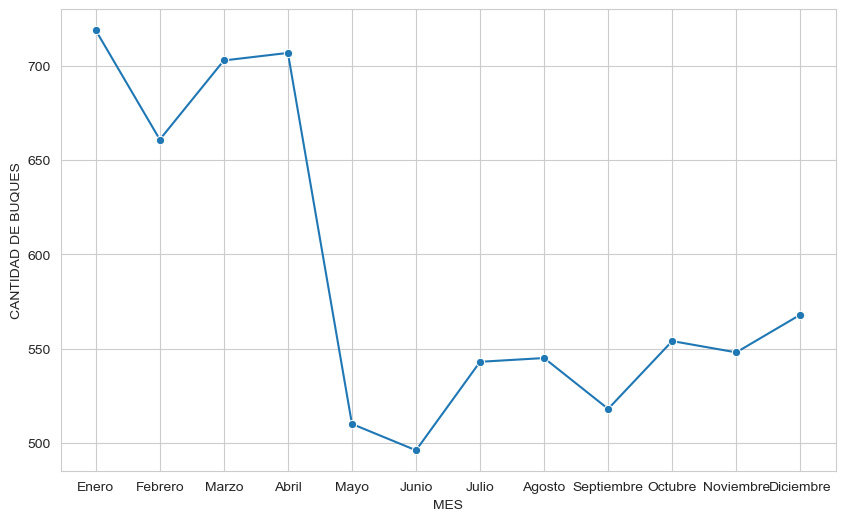

In [12]:

plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.lineplot(data=month_grouped, x="MES", y="CANTIDAD DE BUQUES", marker="o")

In [13]:
month_grouped_by_terminal = df_filtrado_terminales.groupby(["NUM_MES","MESESCALA","TERMINALNOM"]).agg({"IMO": "count"}).reset_index()

month_grouped_by_terminal = month_grouped_by_terminal.rename(columns={'IMO': 'Num_buques', 'MESESCALA':'MES'})
month_grouped_by_terminal

,NUM_MES,MES,TERMINALNOM,Num_buques
0,1,Enero,APMT BARCELONA,278
1,1,Enero,BEST,441
2,2,Febrero,APMT BARCELONA,254
3,2,Febrero,BEST,407
4,3,Marzo,APMT BARCELONA,275
5,3,Marzo,BEST,428
6,4,Abril,APMT BARCELONA,282
7,4,Abril,BEST,425
8,5,Mayo,APMT BARCELONA,197
9,5,Mayo,BEST,313


<AxesSubplot: xlabel='MES', ylabel='Num_buques'>

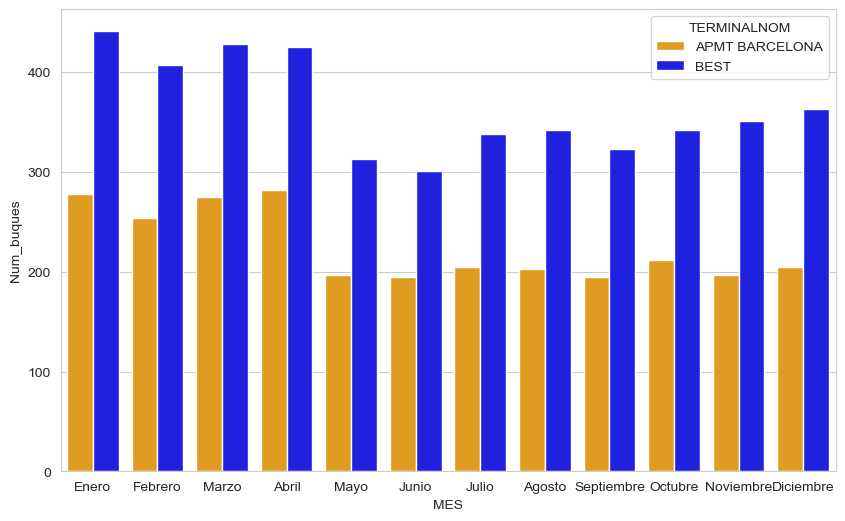

In [14]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.barplot(x='MES', y='Num_buques', hue='TERMINALNOM', data=month_grouped_by_terminal, palette=["orange","blue"], order=["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"])

In [15]:
# Vamos a analizar la probabilidad de que un buque vaya a APMT o vaya a BEST:

cantidad_buques = month_grouped_by_terminal.Num_buques.sum()
cantidad_buques_APMT = month_grouped_by_terminal.loc[month_grouped_by_terminal["TERMINALNOM"]=="APMT BARCELONA"]["Num_buques"].sum()
cantidad_buques_BEST = month_grouped_by_terminal.loc[month_grouped_by_terminal["TERMINALNOM"]=="BEST"]["Num_buques"].sum()

p_APMT = cantidad_buques_APMT/cantidad_buques
p_BEST = 1 - p_APMT

print(f"La probabilidad de que un buque vaya a APMT es de: {p_APMT*100}")
print(f"La probabilidad de que un buque vaya a BEST es de: {p_BEST*100}")

La probabilidad de que un buque vaya a APMT es de: 38.15045248868778
La probabilidad de que un buque vaya a BEST es de: 61.84954751131222


In [16]:
# Creamos 2 dataframes, uno para cada terminal, para visualizar sus tiempos de carga según la eslora:

df_APMT = df_filtrado_terminales[df_filtrado_terminales["TERMINALNOM"]== "APMT BARCELONA"]
df_BEST = df_filtrado_terminales[df_filtrado_terminales["TERMINALNOM"]== "BEST"]

(0.0, 1500.0)

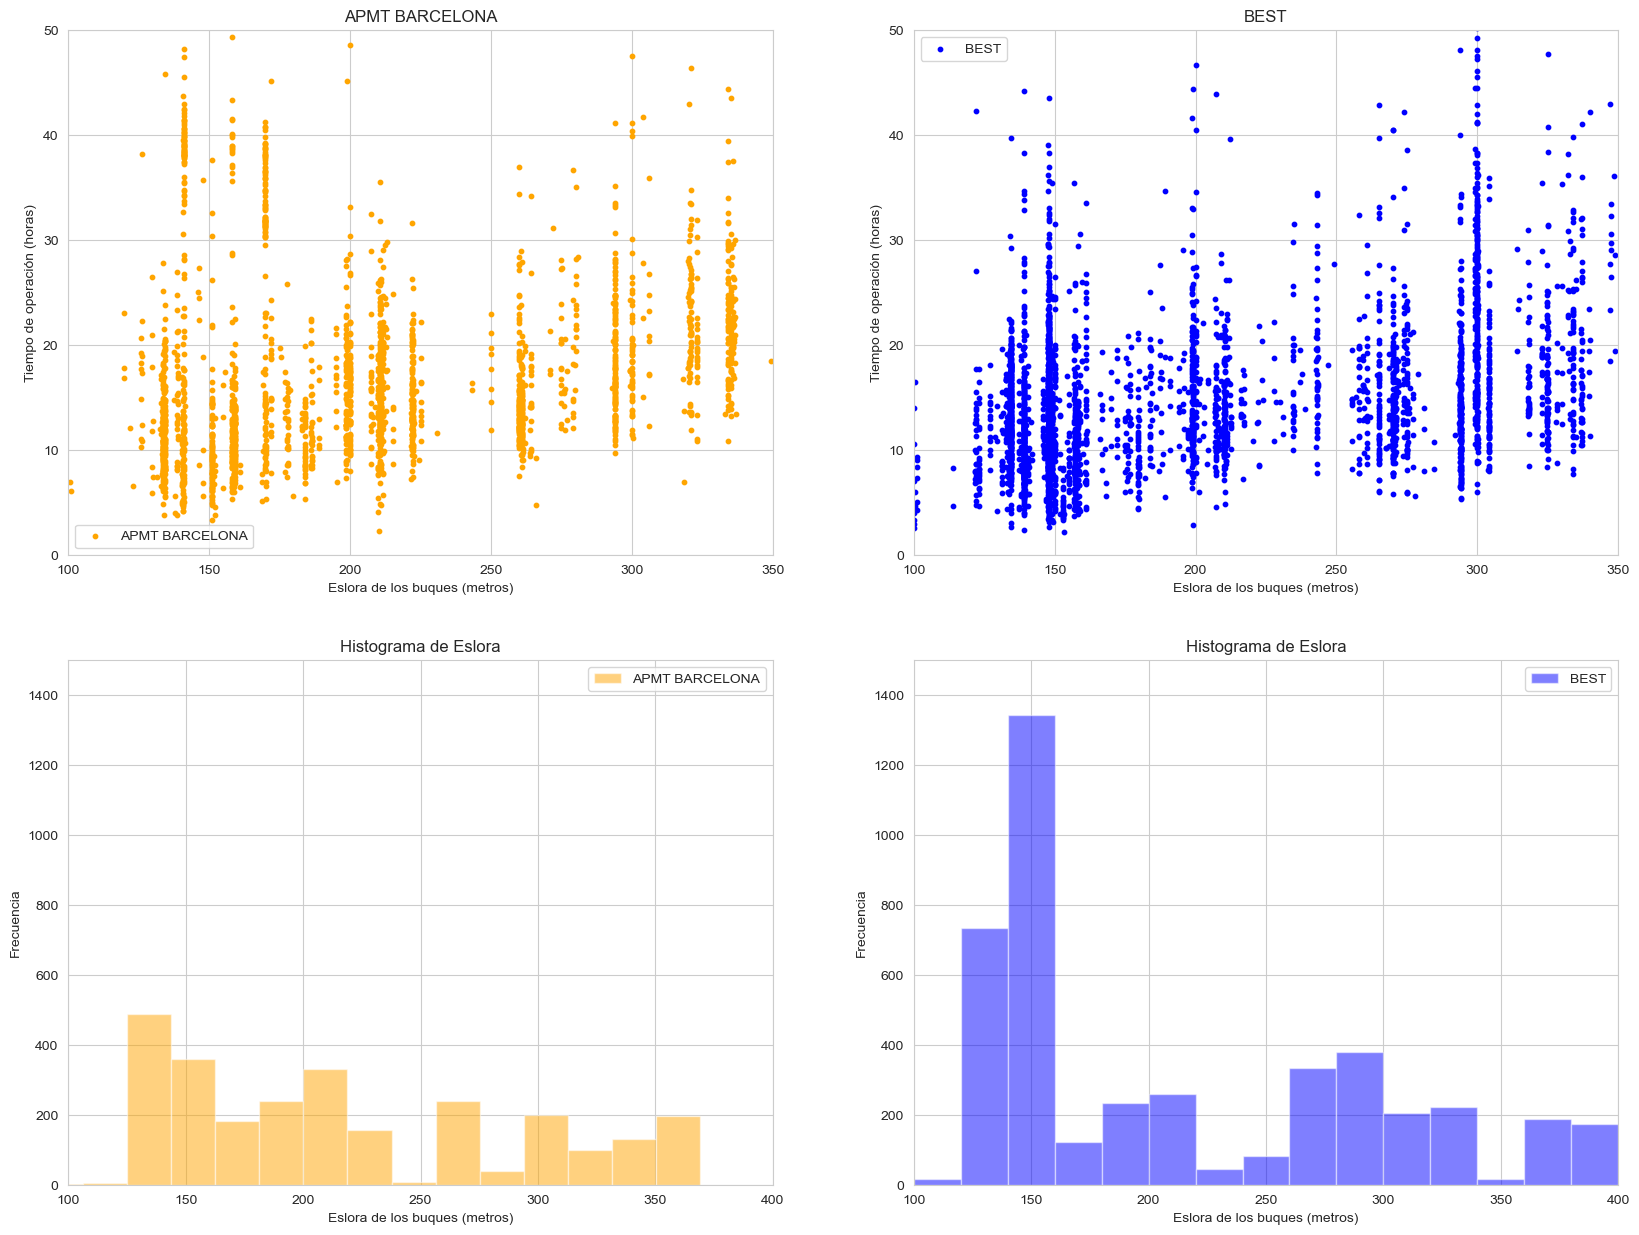

In [35]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2, figsize=(20, 15))

ax1.scatter(df_APMT['ESLORA_METRES'], df_APMT['HORASOPERACIONES'], c='orange', label='APMT BARCELONA', s=10)
ax1.set_xlabel('Eslora de los buques (metros)')
ax1.set_ylabel('Tiempo de operación (horas)')
ax1.set_title('APMT BARCELONA')
ax1.set_xlim(100, 350)
ax1.set_ylim(0, 50)
ax1.legend()

ax2.scatter(df_BEST['ESLORA_METRES'], df_BEST['HORASOPERACIONES'], c='blue', label='BEST', s=10)
ax2.set_xlabel('Eslora de los buques (metros)')
ax2.set_ylabel('Tiempo de operación (horas)')
ax2.set_title('BEST')
ax2.set_xlim(100, 350)
ax2.set_ylim(0, 50)
ax2.legend()

ax3.hist(df_APMT['ESLORA_METRES'], bins=15, alpha=0.5, color='orange', label='APMT BARCELONA')
ax3.set_xlabel('Eslora de los buques (metros)')
ax3.set_ylabel('Frecuencia')
ax3.set_title('Histograma de Eslora')
ax3.legend()
ax3.set_xlim(100, 400)
ax3.set_ylim(0, 1500)

ax4.hist(df_BEST['ESLORA_METRES'], bins=15, alpha=0.5, color='blue', label='BEST')
ax4.set_xlabel('Eslora de los buques (metros)')
ax4.set_ylabel('Frecuencia')
ax4.set_title('Histograma de Eslora')
ax4.legend()
ax4.set_xlim(100, 400)
ax4.set_ylim(0, 1500)

In [18]:
# Para comparar las horas que tardan en operar los buques, vamos a hacerlo por la equivalencia cada 100m de eslora para que sea equitativo.
# De lo contrario, la terminal que recibiera los buques más grandes tendría una media de horas más elevada.
mean_horas_100m = df_filtrado_terminales.groupby('TERMINALNOM')['HORAS/ESLORA_100m'].mean()
mean_horas_100m

TERMINALNOM
APMT BARCELONA    9.153620
BEST              8.185146
Name: HORAS/ESLORA_100m, dtype: float64

3. ANÁLISIS DE LLEGADAS DE BUQUES DE GRAN ESLORA

<AxesSubplot: ylabel='Density'>

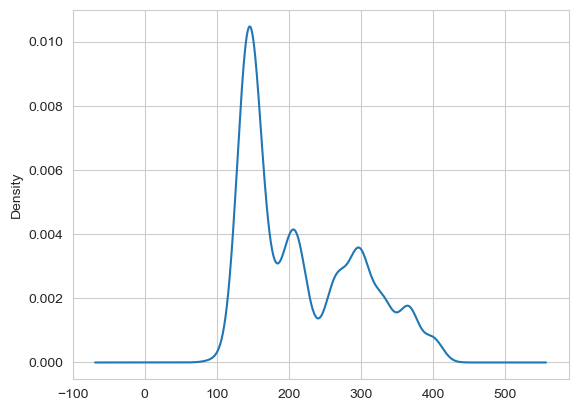

In [19]:
# Vamos a ver en un gráfico de distribución de las esloras:
pd.Series(df_filtrado_terminales["ESLORA_METRES"].values).plot.kde()

In [20]:
# Calculamos mean, median y mode de la eslora y calado con las dos terminales juntas:

eslora_mean = df_filtrado_terminales.ESLORA_METRES.mean()
print(f"La media de eslora de buques es: {eslora_mean}")

eslora_median = df_filtrado_terminales.ESLORA_METRES.median()
print(f'La mediana de eslora de buques es: {eslora_median}')

eslora_mode = df_filtrado_terminales.ESLORA_METRES.mode()
print(f'El modo de eslora de buques es: {eslora_mode}')

calado_mean = df_filtrado_terminales.CALAT_METRES.mean()
print(f"La media de calado de buques es: {calado_mean}")

calado_median = df_filtrado_terminales.CALAT_METRES.median()
print(f"La mediana de calado de buques es: {calado_median}")

calado_mode = df_filtrado_terminales.CALAT_METRES.mode()
print(f"El modo de calado de buques es: {calado_mode}")

La media de eslora de buques es: 216.7993693438914
La mediana de eslora de buques es: 198.6
El modo de eslora de buques es: 0    148.0
Name: ESLORA_METRES, dtype: float64
La media de calado de buques es: 11.126066176470587
La mediana de calado de buques es: 11.15
El modo de calado de buques es: 0    8.51
Name: CALAT_METRES, dtype: float64


In [21]:
# Con estos resultados, queremos calcular la probabilidad de que los buques grandes vayan a cada terminal:
total_buques = df_filtrado_terminales["ESLORA_METRES"].count()
print(f"EL número total de buques que han llegado a ambas terminales es: {total_buques}")
total_buques_grandes = df_filtrado_terminales[df_filtrado_terminales["ESLORA_METRES"]>eslora_mean]["ESLORA_METRES"].count()
print(f"El número de buques mayor que la media de eslora que han llegado a ambas terminales es: {total_buques_grandes}")
total_buques_grandes_APMT = df_filtrado_terminales[df_filtrado_terminales["ESLORA_METRES"]>eslora_mean].groupby("TERMINALNOM")["ESLORA_METRES"].count()["APMT BARCELONA"]
print(f"El total de buques mayores que la media de eslora que han llegado a APMT es: {total_buques_grandes_APMT}")
total_buques_grandes_BEST = total_buques_grandes - total_buques_grandes_APMT
print(f"El total de buques mayores que la media de eslora que han llegado a BEST es: {total_buques_grandes_BEST}")

EL número total de buques que han llegado a ambas terminales es: 7072
El número de buques mayor que la media de eslora que han llegado a ambas terminales es: 2747
El total de buques mayores que la media de eslora que han llegado a APMT es: 1081
El total de buques mayores que la media de eslora que han llegado a BEST es: 1666


In [22]:
# Probabilidad de que vengan buques grandes a Barcelona:
prob_bg_BCN = total_buques_grandes/total_buques
print(f"La probabilidad de que vengan buques grandes a BCN es de: {prob_bg_BCN*100:.2f}%")

prob_bg_APMT = total_buques_grandes_APMT/total_buques_grandes
print(f"La probabilidad de que, si llega un buque grande, atraque en APMT es de: {prob_bg_APMT*100:.2f}%")

prob_bg_BEST = 1 - prob_bg_APMT
print(f"La probabilidad de que, si llega un buque grande, atraque en BEST es de: {prob_bg_BEST*100:.2f}%")

La probabilidad de que vengan buques grandes a BCN es de: 38.84%
La probabilidad de que, si llega un buque grande, atraque en APMT es de: 39.35%
La probabilidad de que, si llega un buque grande, atraque en BEST es de: 60.65%


In [23]:
# calculamos la probabilidad de que llegue un buque grande a cada terminal:

prob_tot_bg_APMT = prob_bg_BCN * prob_bg_APMT
print(f"La probabilidad de que llegue un buque grande a APMT es de: {prob_tot_bg_APMT*100:.2f}%")

prob_tot_bg_BEST = prob_bg_BCN * prob_bg_BEST
print(f"La probabilidad de que llegue un buque grande a BEST es de: {prob_tot_bg_BEST*100:.2f}%")


La probabilidad de que llegue un buque grande a APMT es de: 15.29%
La probabilidad de que llegue un buque grande a BEST es de: 23.56%


3. CREACIÓN DE DF PARA EL ANÁLISIS DE LOS TIEMPOS DE ACCESO EN CAMIÓN A CADA UNA DE LAS TERMINALES

In [24]:
df_horascamion_APMT = pd.DataFrame()
for i in range(2020, 2024):
    df_horascamion_APMT = pd.concat([df_horascamion_APMT, transformacion_tiempos_camion("APMT", i)])

df_horascamion_APMT

,Terminal ABR,Terminal,Any,Mes,Dia,Data,Rang_Data,Tiempo_acceso,dia_semana,Hora
89,APMT,"APM TERMINALS BARCELONA, S.L.U",2020,1,2,2020-01-02,05:40 - 06:00,7.566700,Jueves,5
90,APMT,"APM TERMINALS BARCELONA, S.L.U",2020,1,2,2020-01-02,06:00 - 06:20,4.516667,Jueves,6
91,APMT,"APM TERMINALS BARCELONA, S.L.U",2020,1,2,2020-01-02,06:20 - 06:40,4.675000,Jueves,6
92,APMT,"APM TERMINALS BARCELONA, S.L.U",2020,1,2,2020-01-02,06:40 - 07:00,4.575000,Jueves,6
93,APMT,"APM TERMINALS BARCELONA, S.L.U",2020,1,2,2020-01-02,07:00 - 07:20,5.509387,Jueves,7
...,...,...,...,...,...,...,...,...,...,...
8412,APMT,"APM TERMINALS BARCELONA, S.L.U",2023,4,28,2023-04-28,20:00 - 20:20,6.333300,Viernes,20
8413,APMT,"APM TERMINALS BARCELONA, S.L.U",2023,4,28,2023-04-28,20:20 - 20:40,5.033300,Viernes,20
8414,APMT,"APM TERMINALS BARCELONA, S.L.U",2023,4,28,2023-04-28,20:40 - 21:00,4.900000,Viernes,20
8415,APMT,"APM TERMINALS BARCELONA, S.L.U",2023,4,28,2023-04-28,21:00 - 21:20,42.683300,Viernes,21


In [25]:
df_horascamion_BEST = pd.DataFrame()
for i in range(2020, 2024):
    df_horascamion_BEST = pd.concat([df_horascamion_BEST, transformacion_tiempos_camion("BEST", i)])

df_horascamion_BEST

,Terminal ABR,Terminal,Any,Mes,Dia,Data,Rang_Data,Tiempo_acceso,dia_semana,Hora
87,BEST,TERMINAL CATALUNYA S.A.,2020,1,2,2020-01-02,05:00 - 05:20,9.508325,Jueves,5
88,BEST,TERMINAL CATALUNYA S.A.,2020,1,2,2020-01-02,05:20 - 05:40,9.657250,Jueves,5
89,BEST,TERMINAL CATALUNYA S.A.,2020,1,2,2020-01-02,05:40 - 06:00,6.546030,Jueves,5
90,BEST,TERMINAL CATALUNYA S.A.,2020,1,2,2020-01-02,06:00 - 06:20,8.180397,Jueves,6
91,BEST,TERMINAL CATALUNYA S.A.,2020,1,2,2020-01-02,06:20 - 06:40,9.338227,Jueves,6
...,...,...,...,...,...,...,...,...,...,...
8419,BEST,TERMINAL CATALUNYA S.A.,2023,4,28,2023-04-28,22:20 - 22:40,15.550000,Viernes,22
8421,BEST,TERMINAL CATALUNYA S.A.,2023,4,28,2023-04-28,23:00 - 23:20,34.333300,Viernes,23
8426,BEST,TERMINAL CATALUNYA S.A.,2023,4,29,2023-04-29,00:40 - 01:00,16.616600,Sábado,0
8450,BEST,TERMINAL CATALUNYA S.A.,2023,4,29,2023-04-29,08:40 - 09:00,8.200000,Sábado,8


In [26]:
# Concatenamos los dataframe de ambas terminales:

df_horascamion_totales = pd.concat([df_horascamion_APMT, df_horascamion_BEST])
df_horascamion_totales.sort_values(["Data", "Rang_Data"], ascending=[True,True])


,Terminal ABR,Terminal,Any,Mes,Dia,Data,Rang_Data,Tiempo_acceso,dia_semana,Hora
87,BEST,TERMINAL CATALUNYA S.A.,2020,1,2,2020-01-02,05:00 - 05:20,9.508325,Jueves,5
88,BEST,TERMINAL CATALUNYA S.A.,2020,1,2,2020-01-02,05:20 - 05:40,9.657250,Jueves,5
89,APMT,"APM TERMINALS BARCELONA, S.L.U",2020,1,2,2020-01-02,05:40 - 06:00,7.566700,Jueves,5
89,BEST,TERMINAL CATALUNYA S.A.,2020,1,2,2020-01-02,05:40 - 06:00,6.546030,Jueves,5
90,APMT,"APM TERMINALS BARCELONA, S.L.U",2020,1,2,2020-01-02,06:00 - 06:20,4.516667,Jueves,6
...,...,...,...,...,...,...,...,...,...,...
8419,BEST,TERMINAL CATALUNYA S.A.,2023,4,28,2023-04-28,22:20 - 22:40,15.550000,Viernes,22
8421,BEST,TERMINAL CATALUNYA S.A.,2023,4,28,2023-04-28,23:00 - 23:20,34.333300,Viernes,23
8426,BEST,TERMINAL CATALUNYA S.A.,2023,4,29,2023-04-29,00:40 - 01:00,16.616600,Sábado,0
8450,BEST,TERMINAL CATALUNYA S.A.,2023,4,29,2023-04-29,08:40 - 09:00,8.200000,Sábado,8


In [27]:
# Vamos a comparar en rasgos generales los tiempos de espera para acceder a cada terminal, e iremos aumentando el detalle:

media_total = df_horascamion_totales["Tiempo_acceso"].mean()
print(f"La media de minutos de espera para acceder en camion es: {media_total}")

media_total_APMT = df_horascamion_APMT["Tiempo_acceso"].mean()
print(f"La media de minutos de espera para acceder en camion a APMT es de: {media_total_APMT}")

media_total_BEST = df_horascamion_BEST["Tiempo_acceso"].mean()
print(f"La media de minutos de espera para acceder en camion a BEST es de: {media_total_BEST}")



La media de minutos de espera para acceder en camion es: 19.21297282991043
La media de minutos de espera para acceder en camion a APMT es de: 18.45137375200154
La media de minutos de espera para acceder en camion a BEST es de: 19.895121542345663


In [32]:
grouped_total = df_horascamion_totales.groupby(by=['Terminal ABR', 'Data', 'Hora', 'dia_semana'])["Tiempo_acceso"].mean().reset_index()
grouped_total

,Terminal ABR,Data,Hora,dia_semana,Tiempo_acceso
0,APMT,2020-01-02,5,Jueves,7.566700
1,APMT,2020-01-02,6,Jueves,4.588889
2,APMT,2020-01-02,7,Jueves,9.231914
3,APMT,2020-01-02,8,Jueves,11.108503
4,APMT,2020-01-02,9,Jueves,8.813879
...,...,...,...,...,...
30977,BEST,2023-04-28,22,Viernes,15.550000
30978,BEST,2023-04-28,23,Viernes,34.333300
30979,BEST,2023-04-29,0,Sábado,16.616600
30980,BEST,2023-04-29,8,Sábado,8.200000


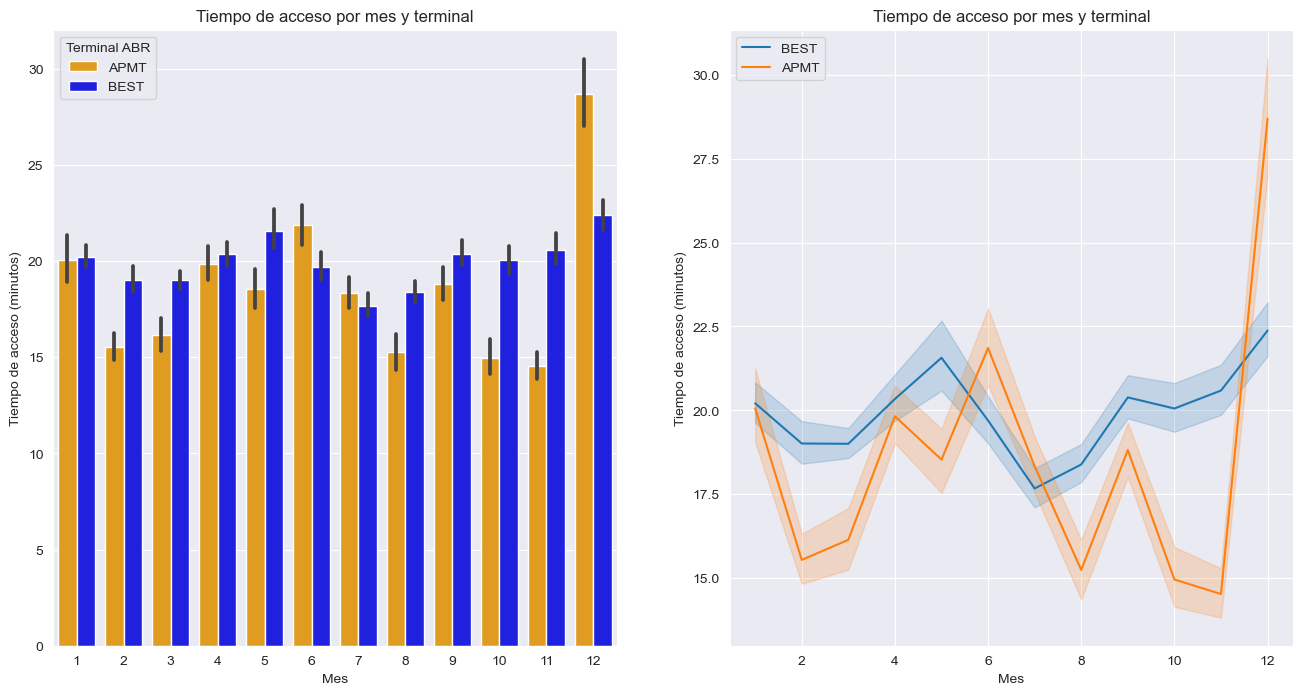

In [39]:
# Vamos a analizarlo por meses:

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 8))

sns.barplot(data=df_horascamion_totales, x="Mes", y="Tiempo_acceso", hue="Terminal ABR", palette=["orange","blue"], ax=ax1)
ax1.set_title("Tiempo de acceso por mes y terminal")
ax1.set_xlabel("Mes")
ax1.set_ylabel("Tiempo de acceso (minutos)")

sns.lineplot(data=df_horascamion_BEST, x="Mes", y="Tiempo_acceso", label='BEST', ax=ax2)
sns.lineplot(data=df_horascamion_APMT, x="Mes", y="Tiempo_acceso", label='APMT', ax=ax2)
ax2.set_title("Tiempo de acceso por mes y terminal")
ax2.set_xlabel("Mes")
ax2.set_ylabel("Tiempo de acceso (minutos)")
ax2.legend(loc='upper left')



In [41]:
# Vamos a analizarlo por día de la semana:
# Agrupamos para obtener la media de tiempo de acceso por cada dia:

grouped_total_dias = df_horascamion_totales.groupby(by=['Terminal ABR', 'dia_semana'])["Tiempo_acceso"].mean().reset_index()

grouped_APMT = df_horascamion_APMT.groupby(by=['Terminal ABR', 'dia_semana'])["Tiempo_acceso"].mean().reset_index()

grouped_BEST = df_horascamion_BEST.groupby(by=['Terminal ABR', 'dia_semana'])["Tiempo_acceso"].mean().reset_index()

Text(0.5, 1.0, 'Tiempo de acceso por día y terminal')

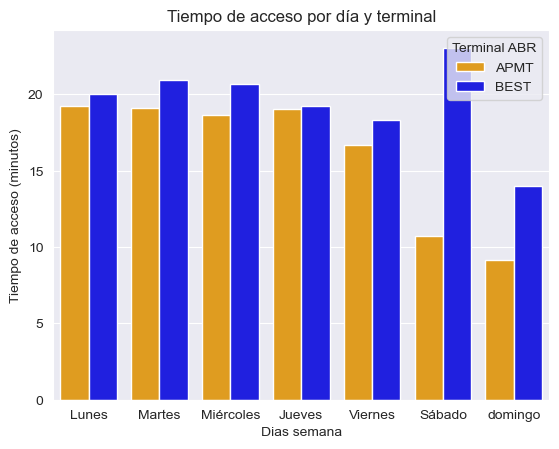

In [75]:
sns.barplot(data=grouped_total_dias, y="Tiempo_acceso", x="dia_semana", hue="Terminal ABR", order=['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'domingo'], palette=["orange", "blue"])
plt.xlabel('Dias semana')
plt.ylabel('Tiempo de acceso (minutos)')
plt.title('Tiempo de acceso por día y terminal')

In [57]:
# Calculamos la media de tiempo de acceso en total y por cada terminal:

media_tiempo_acceso = grouped_total_dias["Tiempo_acceso"].mean()
print(f"La media de tiempo de acceso a ambas terminales en minutos es: {media_tiempo_acceso}")

media_tiempo_acceso_APMT = grouped_total_dias.loc[grouped_total_dias["Terminal ABR"]=="APMT", "Tiempo_acceso"].mean()
print(f"La media de tiempo de acceso a APMT en minutos es: {media_tiempo_acceso_APMT}")

media_tiempo_acceso_BEST = grouped_total_dias.loc[grouped_total_dias["Terminal ABR"]=="BEST", "Tiempo_acceso"].mean()
print(f"La media de tiempo de acceso a BEST en minutos es: {media_tiempo_acceso_BEST}")

La media de tiempo de acceso a ambas terminales en minutos es: 17.775013279722906
La media de tiempo de acceso a APMT en minutos es: 16.083499387852964
La media de tiempo de acceso a BEST en minutos es: 19.46652717159284


In [73]:
# Calculamos la probabilidad de que tardemos más de la media para cada terminal:

APMT_con_retraso = df_horascamion_totales.loc[(df_horascamion_totales["Terminal ABR"]=="APMT") & (df_horascamion_totales["Tiempo_acceso"]>=media_tiempo_acceso), "Tiempo_acceso"].count()
print(APMT_con_retraso)

BEST_con_retraso = df_horascamion_totales.loc[(df_horascamion_totales["Terminal ABR"]=="BEST") & (df_horascamion_totales["Tiempo_acceso"]>=media_tiempo_acceso), "Tiempo_acceso"].count()
print(BEST_con_retraso)

APMT_total = df_horascamion_totales.loc[(df_horascamion_totales["Terminal ABR"]=="APMT"), "Tiempo_acceso"].count()
print(APMT_total)

BEST_total = df_horascamion_totales.loc[(df_horascamion_totales["Terminal ABR"]=="BEST"), "Tiempo_acceso"].count()
print(BEST_total)

9549
16573
38705
43213


In [74]:
# Calculamos la probabilidad de retraso en cada terminal:

APMT_prob_retraso = APMT_con_retraso/APMT_total * 100
print(f"La probabilidad de tardar más de la media en acceder a APMT es de: {APMT_prob_retraso}")

BEST_prob_retraso = BEST_con_retraso/BEST_total * 100
print(f"La probabilidad de tardar más de la media en acceder a BEST es de: {BEST_prob_retraso}")

La probabilidad de tardar más de la media en acceder a APMT es de: 24.671231107092105
La probabilidad de tardar más de la media en acceder a BEST es de: 38.35188484946659


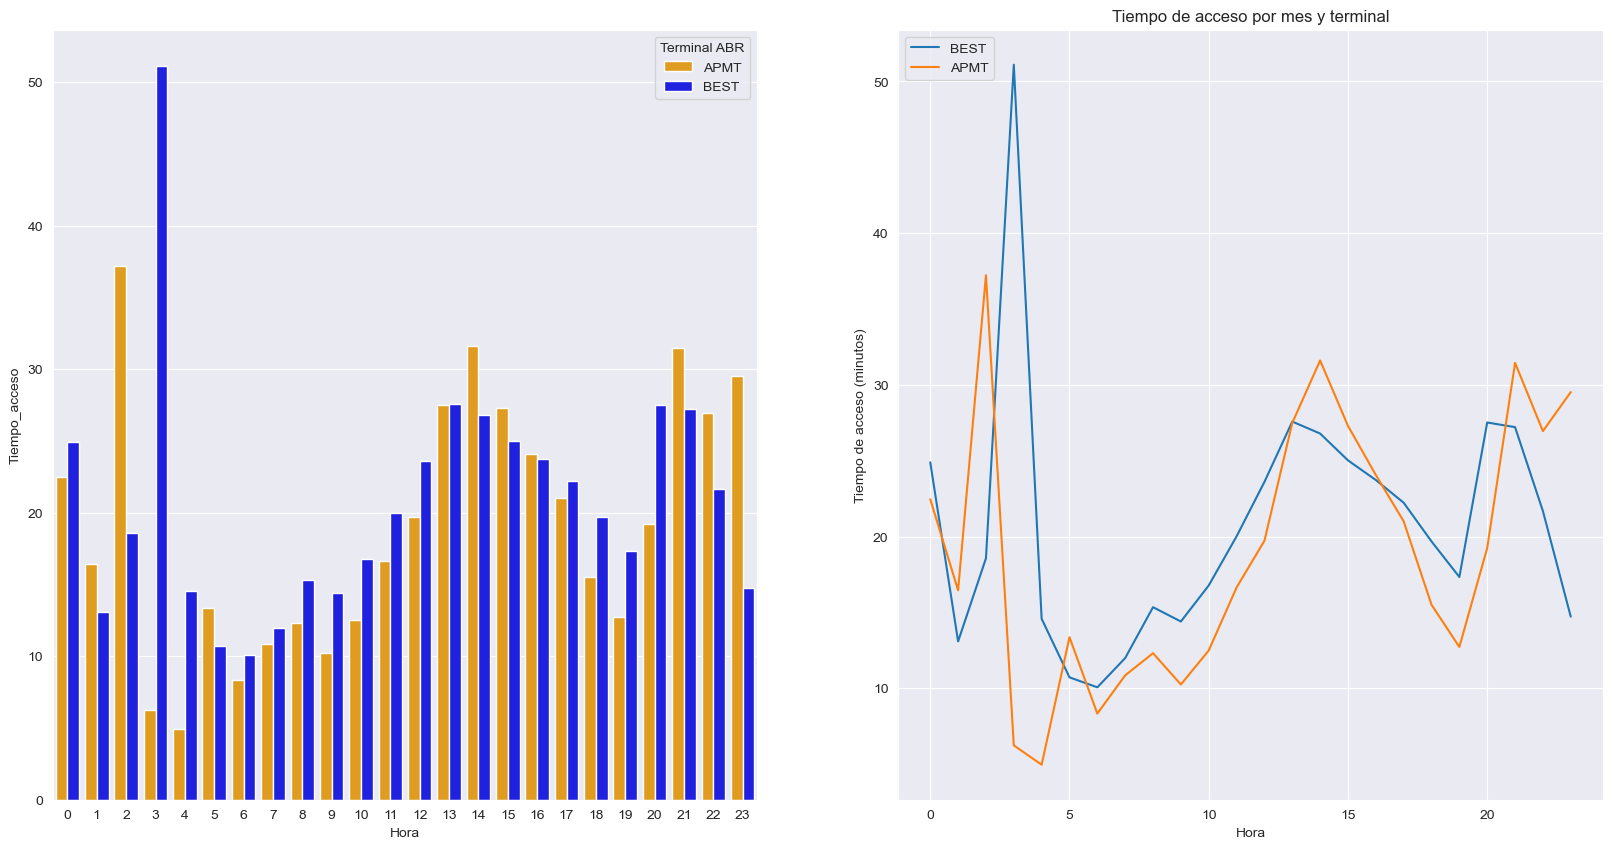

In [80]:
# Ahora vamos a estudiarlo por hora del día:

grouped_total_horas = df_horascamion_totales.groupby(by=['Terminal ABR', 'Hora'])["Tiempo_acceso"].mean().reset_index()

grouped_total_horas_APMT = df_horascamion_APMT.groupby(by=['Terminal ABR', 'Hora'])["Tiempo_acceso"].mean().reset_index()

grouped_total_horas_BEST = df_horascamion_BEST.groupby(by=['Terminal ABR', 'Hora'])["Tiempo_acceso"].mean().reset_index()

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 10))

sns.barplot(data=grouped_total_horas, y="Tiempo_acceso", x="Hora", hue="Terminal ABR", palette=["orange", "blue"], ax=ax1)
plt.xlabel('Hora del dia')
plt.ylabel('Tiempo de acceso (minutos)')
plt.title('Tiempo de acceso por hora y terminal')

sns.lineplot(data=grouped_total_horas_BEST, x="Hora", y="Tiempo_acceso", label='BEST', ax=ax2)
sns.lineplot(data=grouped_total_horas_APMT, x="Hora", y="Tiempo_acceso", label='APMT', ax=ax2)
ax2.set_title("Tiempo de acceso por mes y terminal")
ax2.set_xlabel("Hora")
ax2.set_ylabel("Tiempo de acceso (minutos)")
ax2.legend(loc='upper left')